[['Input', 'Output'], ['1', '15'], ['2', '20'], ['3', '25'], ['4', '30'], ['5', '35'], ['6', '40'], ['7', '45'], ['8', '50'], ['9', '55'], ['10', '60'], ['11', '65'], ['12', '70'], ['13', '75'], ['14', '80'], ['15', '85'], ['16', '90'], ['17', '95'], ['18', '100'], ['19', '105'], ['20', '110']]
Epoch 1/20
1/1 [==============================] - 0s 442ms/step - loss: 4993.3521
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 4990.6177
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 4988.5596
Epoch 4/20
1/1 [==============================] - 0s 10ms/step - loss: 4986.8135
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 4985.2432
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 4983.7876
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 4982.4111
Epoch 8/20
1/1 [==============================] - 0s 10ms/step - loss: 4981.0952
Epoch 9/20
1/1 [==============================] - 0s 12m

array([[0.14404243]], dtype=float32)

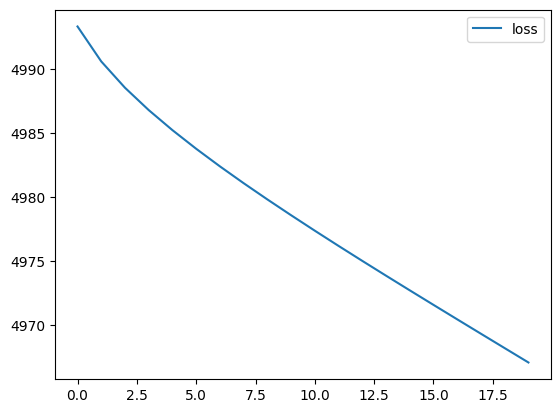

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('exp no 1').sheet1
data=worksheet.get_all_values()
print(data)

dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

X = dataset1[['Input']].values
y = dataset1[['Output']].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.60,random_state = 30)

Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

ai_model=Sequential([
    Dense(units=8,activation='relu',input_shape=[1]),
    Dense(units=9,activation='relu'),
    Dense(units=1)
])

ai_model.compile(optimizer='rmsprop',loss='mse')

ai_model.fit(X_train1,y_train,epochs=20)

loss_df = pd.DataFrame(ai_model.history.history)
loss_df.plot()

X_test1 = Scaler.transform(X_test)
ai_model.evaluate(X_test1,y_test)

X_n1 = [[1]]
X_n1_1 = Scaler.transform(X_n1)
ai_model.predict(X_n1_1)